# Project Title - Data Science Project

The dataset used is of netflix movies and TV shows. The dataset is collected from Flixable which is a third-party Netflix search engine. It is a public dataset on Kaggle.

I'm trying to explore various trends in the number of movies and TV shows and the general pattern in ratings.

I'll be using pandas and various kinds of graphs and plots to gather some useful insights.

This is the course project for the course: [Data Analysis with Python: Zero to Pandas](zerotopandas.com). It's a free certification course provided by jovian ml. 

It taught my various tools and techinques to explore real world datasets and draw reasonable conclusions.

### How to run the code

This is an executable [*Jupyter notebook*](https://jupyter.org) hosted on [Jovian.ml](https://www.jovian.ml), a platform for sharing data science projects. You can run and experiment with the code in a couple of ways: *using free online resources* (recommended) or *on your own computer*.

#### Option 1: Running using free online resources (1-click, recommended)

The easiest way to start executing this notebook is to click the "Run" button at the top of this page, and select "Run on Binder". This will run the notebook on [mybinder.org](https://mybinder.org), a free online service for running Jupyter notebooks. You can also select "Run on Colab" or "Run on Kaggle".


#### Option 2: Running on your computer locally

1. Install Conda by [following these instructions](https://conda.io/projects/conda/en/latest/user-guide/install/index.html). Add Conda binaries to your system `PATH`, so you can use the `conda` command on your terminal.

2. Create a Conda environment and install the required libraries by running these commands on the terminal:

```
conda create -n zerotopandas -y python=3.8 
conda activate zerotopandas
pip install jovian jupyter numpy pandas matplotlib seaborn opendatasets --upgrade
```

3. Press the "Clone" button above to copy the command for downloading the notebook, and run it on the terminal. This will create a new directory and download the notebook. The command will look something like this:

```
jovian clone notebook-owner/notebook-id
```



4. Enter the newly created directory using `cd directory-name` and start the Jupyter notebook.

```
jupyter notebook
```

You can now access Jupyter's web interface by clicking the link that shows up on the terminal or by visiting http://localhost:8888 on your browser. Click on the notebook file (it has a `.ipynb` extension) to open it.


## Downloading the Dataset

- Find an interesting dataset
- Install jovian and import opendatasets (a python library).
- Download the dataset

In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
# Change this
dataset_url = 'https://www.kaggle.com/shivamb/netflix-shows' 

In [3]:
import opendatasets as od
od.download(dataset_url)

Kaggle dataset ID:  shivamb/netflix-shows


0it [00:00, ?it/s]

999424it [00:00, 1113455.74it/s]          

Extracting archive ./netflix-shows.zip to ./netflix-shows


The dataset has been downloaded and extracted.

In [4]:
# Change this
data_dir = './netflix-shows'

In [5]:
import os
os.listdir(data_dir)

['netflix_titles.csv']

Let us save and upload our work to Jovian before continuing.

In [6]:
project_name = "courseproject"

In [7]:
!pip install jovian --upgrade -q

In [8]:
import jovian

<IPython.core.display.Javascript object>

In [11]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Detected Kaggle notebook...
[jovian] Please enter your API key ( from https://jovian.ml/ ):
API KEY: ········
[jovian] Uploading notebook to https://jovian.ml/twishabansal07/courseproject


<IPython.core.display.Javascript object>

## Data Preparation and Cleaning

- Open the CSV file in a pandas dataframe
- Look at the shape i.e. (no_of_rows, no_of_columns)
- Check some basic statistics of the columns which have integer values
- Check which columns and nan values and handle the missing data
- Extract the date, month and year from the date type column into 3 separate columns



In [9]:
import pandas as pd

We read the CSV file

In [10]:
raw_df = pd.read_csv(data_dir + '/netflix_titles.csv')
raw_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
...,...,...,...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,NaN,NaN,2016,NaN,60 min,Movies,Nursery rhymes and original music for children...
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


In [11]:
raw_df.shape

(6234, 12)

In [12]:
raw_df.describe()

,show_id,release_year
count,6.234000e+03,6234.00000
mean,7.670368e+07,2013.35932
std,1.094296e+07,8.81162
min,2.477470e+05,1925.00000
25%,8.003580e+07,2013.00000
50%,8.016337e+07,2016.00000
75%,8.024489e+07,2018.00000
max,8.123573e+07,2020.00000


Check which columns have missing values

In [13]:
raw_df.isna().any()

show_id         False
type            False
title           False
director         True
cast             True
country          True
date_added       True
release_year    False
rating           True
duration        False
listed_in       False
description     False
dtype: bool

Drop the rows which have missing values of date_added.

In [14]:
proc_df = raw_df.dropna(subset = ["date_added"]) 
proc_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
...,...,...,...,...,...,...,...,...,...,...,...,...
6218,80162994,TV Show,Talking Tom and Friends,NaN,"Colin Hanks, Tom Kenny, James Adomian, Lisa Sc...","Cyprus, Austria, Thailand","April 10, 2019",2017,TV-G,2 Seasons,"Kids' TV, TV Comedies",Full of funny one-liners and always ready for ...
6219,80186475,TV Show,Pokémon the Series,NaN,"Sarah Natochenny, Laurie Hymes, Jessica Paquet...",Japan,"April 1, 2019",2019,TV-Y7-FV,2 Seasons,"Anime Series, Kids' TV",Ash and his Pikachu travel to the Alola region...
6220,70272742,TV Show,Justin Time,NaN,"Gage Munroe, Scott McCord, Jenna Warren",Canada,"April 1, 2016",2012,TV-Y,2 Seasons,Kids' TV,"In Justin's dreams, he and his imaginary frien..."
6221,80067942,TV Show,Terrace House: Boys & Girls in the City,NaN,"You, Reina Triendl, Ryota Yamasato, Yoshimi To...",Japan,"April 1, 2016",2016,TV-14,2 Seasons,"International TV Shows, Reality TV",A new set of six men and women start their liv...


Change date fomat

In [15]:
proc_df['date_added'] = [pd.to_datetime(d) for d in proc_df['date_added']]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In proc_df, add three separate columns, each for date, month and year added

In [16]:
proc_df['date'] = proc_df['date_added'].dt.day
proc_df['month'] = proc_df['date_added'].dt.month
proc_df['year'] = proc_df['date_added'].dt.year

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

Delete the date added column

In [17]:
del proc_df['date_added']

In [18]:
proc_df

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,date,month,year
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,9,9,2019
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,9,9,2016
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",8,9,2018
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,8,9,2018
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,8,9,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6218,80162994,TV Show,Talking Tom and Friends,NaN,"Colin Hanks, Tom Kenny, James Adomian, Lisa Sc...","Cyprus, Austria, Thailand",2017,TV-G,2 Seasons,"Kids' TV, TV Comedies",Full of funny one-liners and always ready for ...,10,4,2019
6219,80186475,TV Show,Pokémon the Series,NaN,"Sarah Natochenny, Laurie Hymes, Jessica Paquet...",Japan,2019,TV-Y7-FV,2 Seasons,"Anime Series, Kids' TV",Ash and his Pikachu travel to the Alola region...,1,4,2019
6220,70272742,TV Show,Justin Time,NaN,"Gage Munroe, Scott McCord, Jenna Warren",Canada,2012,TV-Y,2 Seasons,Kids' TV,"In Justin's dreams, he and his imaginary frien...",1,4,2016
6221,80067942,TV Show,Terrace House: Boys & Girls in the City,NaN,"You, Reina Triendl, Ryota Yamasato, Yoshimi To...",Japan,2016,TV-14,2 Seasons,"International TV Shows, Reality TV",A new set of six men and women start their liv...,1,4,2016


In [22]:
import jovian

In [24]:
jovian.commit(project = project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Detected Kaggle notebook...
[jovian] Uploading notebook to https://jovian.ml/twishabansal07/courseproject


<IPython.core.display.Javascript object>

## Exploratory Analysis and Visualization

- Visualsing the frequencies of the Release years and ratings
- Analyzing the relationship between Year added and year released and watching trends



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [19]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [20]:
proc_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'date', 'month', 'year'],
      dtype='object')

In [21]:
proc_df.dtypes

show_id          int64
type            object
title           object
director        object
cast            object
country         object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
date             int64
month            int64
year             int64
dtype: object

Getting stastical data about integer columns

In [22]:
proc_df.describe()

,show_id,release_year,date,month,year
count,6.223000e+03,6223.000000,6223.000000,6223.000000,6223.000000
mean,7.670879e+07,2013.362205,12.003535,6.837538,2017.983288
std,1.095015e+07,8.816695,10.031739,3.621890,1.204851
min,2.477470e+05,1925.000000,1.000000,1.000000,2008.000000
25%,8.003654e+07,2013.000000,1.000000,4.000000,2017.000000
50%,8.016353e+07,2016.000000,11.000000,7.000000,2018.000000
75%,8.024498e+07,2018.000000,20.000000,10.000000,2019.000000
max,8.123573e+07,2020.000000,31.000000,12.000000,2020.000000


We plot a histogram and observe that most of the content on netflix has been released in the last decade.
This implies a growing "streaming" culture and abandoning the good old fashioned TV.
The first decade of the 21st century marks the transition.

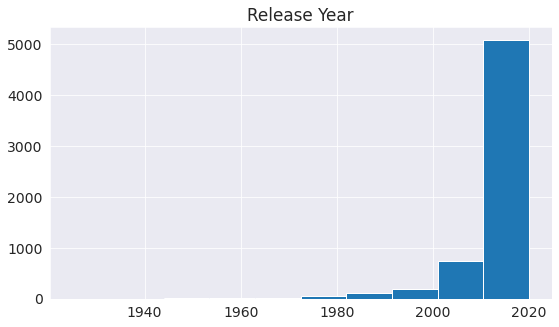

In [23]:
plt.title("Release Year")
plt.hist(raw_df['release_year']);

Most of the netflix content is TV-MA rating which is the most extreme TV rating. Next, we see that the most common rating is TV-14. The other rating types have a fairly small share.


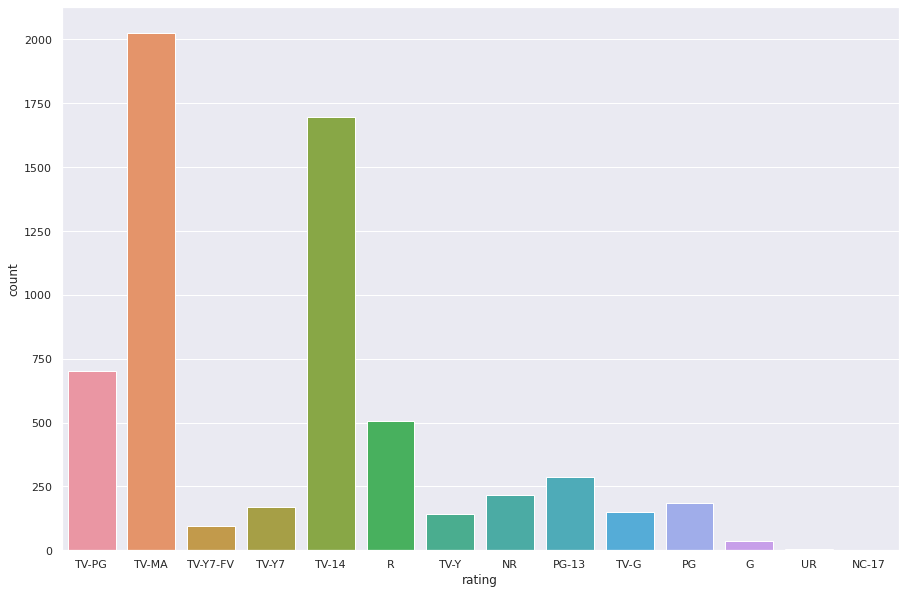

In [99]:
plt.figure(figsize = (15,10))
sns.countplot(x='rating',data = raw_df);

Next, we observe the trends of the content year added and released and also the relationship between them. 
Most of the content was added after 2015 owing to the rapidly growing popularity of the streaming services.
Though, there has been a fair amount of content released before the 1000. The film industry that time was strong.

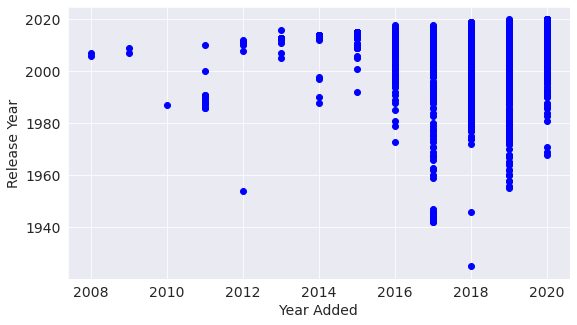

In [25]:
plt.scatter(proc_df['year'], proc_df['release_year'], c ="blue");
plt.xlabel("Year Added");
plt.ylabel("Release Year");

Let us save and upload our work to Jovian before continuing

In [55]:
import jovian

In [100]:
jovian.commit(project = project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Detected Kaggle notebook...
[jovian] Uploading notebook to https://jovian.ml/twishabansal07/courseproject


<IPython.core.display.Javascript object>

## Asking and Answering Questions

We take up five interesting questions and answer them using visualtions and tables.



#### Q1: Which countries have the most content on Netflix?

We create a dataframe with the count of the top 13 countries with the most content and visualise it using a pie chart

In [105]:
df_countries = pd.DataFrame(raw_df['country'].value_counts().reset_index().values, columns=["country", "count"])
df_countries = df_countries.head(13)
df_countries

,country,count
0,United States,2032
1,India,777
2,United Kingdom,348
3,Japan,176
4,Canada,141
5,South Korea,136
6,Spain,117
7,France,90
8,Mexico,83
9,Turkey,79


The pie chart gives the approximate proportion of contributions among the top 12 countries

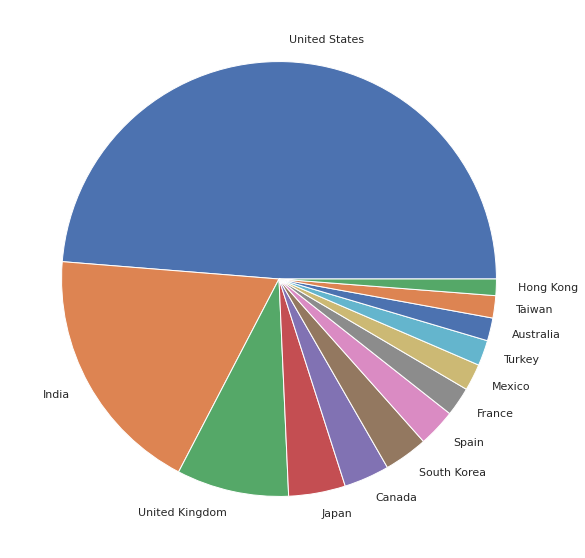

In [106]:
plt.figure(figsize = (15,10))
plt.pie(df_countries['count'], labels = df_countries['country']);

United States has the most netflix content followed by India and United Kingdom.

#### Q2: What are the most popular months of release?

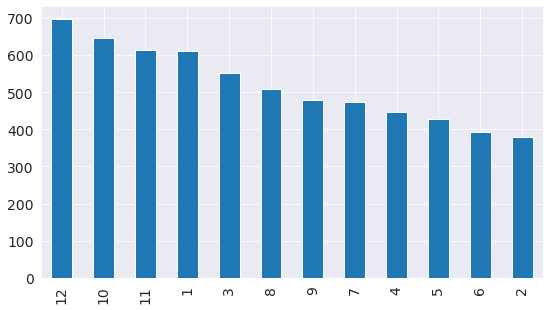

In [35]:
proc_df['month'].value_counts().plot.bar();

We observe that the highest amount of content has been uploaded in the month 12 i.e. December

#### Q3: What are the most common independent genres?

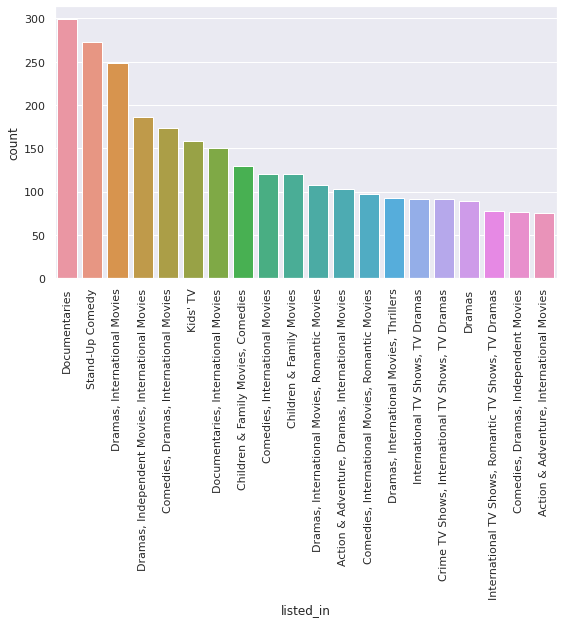

In [46]:
sns.countplot(x='listed_in',data = raw_df, order = raw_df["listed_in"].value_counts().index[0:20]);
plt.xticks(rotation = 90);

The highest amount of single genre content are the documentaries.
However, we can see that dramas as an accompanying genre is pretty popular

#### Q4: Who are the most popular directors of the netflix content?

In [52]:
raw_df['director'].value_counts()[:15]

Raúl Campos, Jan Suter    18
Marcus Raboy              14
Jay Karas                 13
Jay Chapman               12
Steven Spielberg           9
Martin Scorsese            9
David Dhawan               8
Lance Bangs                8
Johnnie To                 8
Cathy Garcia-Molina        7
Shannon Hartman            7
S.S. Rajamouli             7
Quentin Tarantino          7
Hakan Algül                7
Ryan Polito                7
Name: director, dtype: int64

Raúl Campos, Jan Suter directed the most pieces of content followed by Marcus Raboy, Jay Karas and Jay Chapman.

#### Q5: What duration movies are the most preferred?

df_mov is created such that it contains only rows which contain Movies

In [87]:
df_mov = raw_df[raw_df['type']=='Movie']


We convert the object time duration of the movies into simple integers

In [88]:
df_mov['duration'] = [int(d[:-4]) for d in df_mov['duration']]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [90]:
df_mov

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99,Comedies,When nerdy high schooler Dani finally attracts...
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f..."
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,"September 8, 2017",2017,TV-MA,60,Stand-Up Comedy,Fabrizio Copano takes audience participation t...
...,...,...,...,...,...,...,...,...,...,...,...,...
5577,80085438,Movie,Frank and Cindy,G.J. Echternkamp,NaN,United States,"April 1, 2016",2007,TV-MA,70,Documentaries,Frank was a rising pop star when he married Ci...
5578,80085439,Movie,Frank and Cindy,G.J. Echternkamp,"Rene Russo, Oliver Platt, Johnny Simmons, Jane...",United States,"April 1, 2016",2015,R,102,"Comedies, Dramas, Independent Movies",A student filmmaker vengefully turns his camer...
5579,80011846,Movie,Iverson,Zatella Beatty,Allen Iverson,United States,"April 1, 2016",2014,NR,88,"Documentaries, Sports Movies",This unfiltered documentary follows the rocky ...
5580,80064521,Movie,Jeremy Scott: The People's Designer,Vlad Yudin,Jeremy Scott,United States,"April 1, 2016",2015,PG-13,109,Documentaries,The journey of fashion designer Jeremy Scott f...


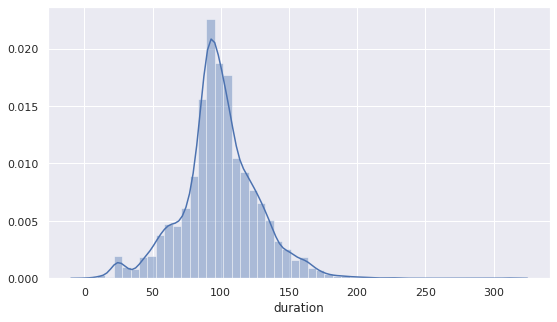

In [96]:
sns.distplot(df_mov.duration);

We observe that most of the movies are about 100 mintues long. 

Let us save and upload our work to Jovian before continuing.

In [28]:
import jovian

In [107]:
jovian.commit(project = project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Detected Kaggle notebook...
[jovian] Uploading notebook to https://jovian.ml/twishabansal07/courseproject


<IPython.core.display.Javascript object>

## Inferences and Conclusion

We see the advent of the netflix era. More and more content is produced and consumed. We see that The USA produces a large majority of the content.

We also see that most of the content is made for people older than 17. The young generation is the one using the platform the most.
We also see that documentries are the most popular independent genre which is reasonable since most of the other genres have another independent genre.
However, we observe that drama is a popular companion genre.

This gives us insights about the likes of the audience since the content is produced based on demand.

In [108]:
import jovian

In [110]:
jovian.commit(project = project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Detected Kaggle notebook...
[jovian] Uploading notebook to https://jovian.ml/twishabansal07/courseproject


<IPython.core.display.Javascript object>

## References and Future Work

More rigorous data cleaning and better visualisation techniques.
The visualtions can also be customised depending on the need.
A proper story work and data analysis about how the netflix is becoming more and more popular.

#### References

- https://matplotlib.org/
- https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/

In [32]:
import jovian

In [111]:
jovian.commit(project = project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Detected Kaggle notebook...
[jovian] Uploading notebook to https://jovian.ml/twishabansal07/courseproject


<IPython.core.display.Javascript object>